# Predicting Student Performance Using Linear Regression

## Introduction

In this project, we aim to predict the percentage score of students based on the number of hours they study using a supervised machine learning technique called linear regression. The goal is to demonstrate how we can use simple linear regression to understand the relationship between two variables and make predictions based on that relationship.

## Objective

The primary objective of this task is to develop a predictive model that can estimate a student's score based on their study hours. This involves several key steps:
1. **Data Collection:** Obtaining the dataset containing information about study hours and corresponding scores.
2. **Data Visualization:** Visualizing the data to understand the relationship between study hours and scores.
3. **Data Preparation:** Preparing the data for training and testing the model.
4. **Model Training:** Using linear regression to train a predictive model on the training data.
5. **Model Evaluation:** Evaluating the model's performance using the test data and various evaluation metrics.
6. **Prediction:** Using the trained model to predict the score for a student who studies 9.25 hours per day.

### Importance

This analysis is important because it provides insights into how study habits impact student performance. By understanding the relationship between study hours and scores, students can optimize their study schedules to maximize their performance. Additionally, educators can use these insights to design better study programs and interventions.

## Import Libraries

To accomplish this task, we will utilize the following libraries:
- **Pandas:** A Python library for data manipulation and analysis.
- **Matplotlib:** A Python library for data visualization.
- **Scikit-learn:** A Python library for machine learning that provides tools for data preprocessing, model training, and evaluation.
  - **sklearn.model_selection.train_test_split:** Used to split the data into training and testing sets.
  - **sklearn.linear_model.LinearRegression:** Used to create and train a linear regression model.
  - **sklearn.metrics:** Used to evaluate the performance of the model.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Dataset

The dataset used in this project is publicly available and can be accessed from [this link](http://bit.ly/w-data). It contains two columns:
- **Hours:** The number of hours a student studies.
- **Scores:** The percentage score a student achieves.

### Load the Data

In [ ]:
# Loading the Data
data_url = 'http://bit.ly/w-data'  # URL of the dataset
data = pd.read_csv(data_url)  # Reading the dataset into a DataFrame

# Displaying the first few rows of the dataset to understand its structure
# The head() function displays the first 5 rows of the DataFrame by default.
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Understand the Data

In [ ]:
# Get a summary of the dataset, including data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


It contains 25 rows and 2 columns. The first column named 'Hours' contains data of type float64, while the second column named 'Scores' contains data of type int64. Both columns have no missing values (non-null).

In [ ]:
## Display summary statistics of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualize the Data

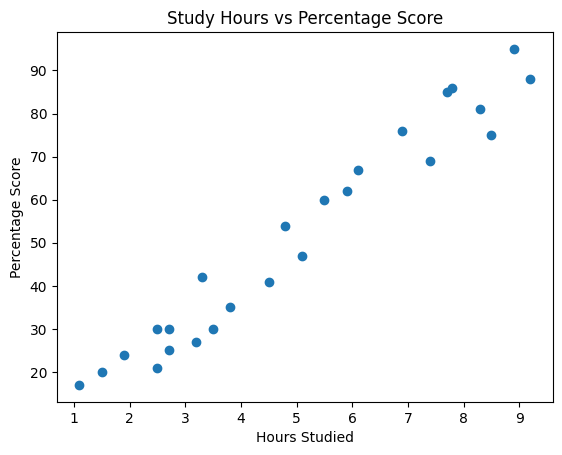

In [ ]:
# Create a scatter plot to visualize the relationship between study hours and scores
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Study Hours vs Percentage Score')
plt.show()

From the scatter plot, we can observe several key points:

- The scatter plot illustrates a positive linear relationship between study hours and percentage scores.
- As the number of study hours increases, the percentage score also tends to increase.
- This suggests that students who study more hours generally achieve higher scores.
- The data shows a consistent pattern with minimal outliers.
- The consistency of the data makes it suitable for developing predictive models using linear regression.

## Prepare the Data for Training

In [ ]:
# Define the feature (independent variable) and target (dependent variable)
X = data[['Hours']] # Feature: Hours studied (independent variable)
y = data['Scores'] # Target: Percentage score (dependent variable)

# Split the data into training and testing sets(80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Model

In [ ]:
# Training the Model
# Creating an instance of the LinearRegression model
model = LinearRegression()

# Fitting the model to the training data
# The fit() method trains the model on the training data
model.fit(X_train, y_train)

LinearRegression()

## Make a Prediction

In [ ]:
# Predicting the score for a student who studies 9.25 hours/day
hours = pd.DataFrame({'Hours': [9.25]}) # Number of hours studied (9.25 hours)
predicted_score = model.predict(hours) # Predicting the score for 9.25 hours of study
print(f'Predicted score for studying 9.25 hours/day: {predicted_score[0]:.2f}') # Displaying the prediction

Predicted score for studying 9.25 hours/day: 92.39


## Evaluate the Model

In [ ]:
# Evaluate the Model
y_pred = model.predict(X_test)  # Making predictions on the test data

# Calculating Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Explanation of Metrics
"""
Mean Absolute Error (MAE): Measures the average magnitude of the errors in a set of predictions, without considering their direction. It is the average over the test sample of the absolute differences between prediction and actual observation.
Mean Squared Error (MSE): Measures the average of the squares of the errors. It is more sensitive to outliers than MAE because it squares the error before averaging.
Root Mean Squared Error (RMSE): Is the square root of the MSE. It provides an error metric in the same units as the output variable, making it more interpretable.
"""

In [ ]:
# Displaying the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


**Context:**

The dataset consists of students' study hours and their corresponding scores. The scores range from 17 to 95, and the study hours range from 1.1 to 9.2.

**Interpretation:**
- MAE of 3.92: On average, the model's predictions are off by 3.92 points from the actual scores. Given the score range (17 to 95), this is a relatively small error, indicating good accuracy.
- MSE of 18.94: This metric penalizes larger errors more heavily. A lower MSE suggests that the model is generally making accurate predictions.
- RMSE of 4.35: This means that the average prediction error is about 4.35 points. Considering the range of scores, this error is small, reinforcing that the model performs well.

**Conclusion:**

The model demonstrates strong predictive performance with low error margins relative to the range of scores. This indicates that the model is effective at predicting student scores based on study hours, making it a reliable tool for this dataset.

**Potential Next Steps:**
1. **Include More Features:** To improve the model, we could include additional features such as the type of study material used, the time of day the student studies, and their prior academic performance.
2. **Experiment with Other Models:** While linear regression is a good starting point, experimenting with other regression models like polynomial regression or support vector regression might yield better results.
3. **Cross-Validation:** Use cross-validation techniques to ensure the model's robustness and reliability.
4. **Regularization:** Apply regularization techniques to prevent overfitting and improve the model's generalization to new data.